In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist


In [3]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',500)

In [4]:
#Подготовка данных
df_common = pd.read_csv('data/glo4.csv')
df_common['Дата продажи'] = pd.to_datetime(df_common['Дата продажи'])

C:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\p

In [6]:
df_common.head(500)

Кол-во  Сумма       Клиент Дата продажи     Товар  \
0         1     29      client1   2018-01-22  sku10765   
1         5   1535      client1   2018-01-22  sku13695   
2         2    310      client1   2018-01-22  sku29083   
3         1    399      client1   2018-01-22   sku2954   
4         1     79     client10   2019-05-08   sku1893   
5         1     79     client10   2019-05-08   sku5624   
6         1   4599     client10   2019-05-08   sku7053   
7         1   7299    client100   2019-08-05  sku22214   
8         1     49    client100   2019-10-17  sku11580   
9         1    299    client100   2019-10-17  sku28198   
10        1    139    client100   2019-10-17  sku30008   
11        1    199    client100   2019-10-17     sku39   
12        2     78    client100   2019-10-18  sku28017   
13        2    318   client1000   2018-12-09  sku27351   
14       70   2730   client1000   2018-12-09   sku8135   
15        8   1288   client1000   2018-09-20  sku29626   
16        4    311   client1000   2018-10-20   sku1017   
17        2    143   client1000   2018-10-20  sku10312   
18        1   1019   client1000   2018-11-29   sku5428   
19        1   2599   client1000   2019-03-28   sku1410   
20        1    699   client1000   2019-03-28  sku14271   
21        1   2999   client1000   2019-03-28  sku16699   
22        1   1599   client1000   2019-03-28  sku23430   
23        1    399   client1000   2019-01-07  sku20271   
24        6   3534   client1000   2019-01-07   sku7321   
25        1     38   client1000   2019-07-07  sku23848   
26        1     46   client1000   2019-07-07  sku25426   
27        6   3534   client1000   2019-07-07   sku7321   
28        3    935   client1000   2019-07-07   sku8632   
29        1    149   client1000   2019-10-07  sku22511   
30        3   2265   client1000   2019-10-07   sku3022   
31        1    395   client1000   2019-07-17  sku12204   
32        1    163   client1000   2019-07-17  sku12250   
33        3   2265   client1000   2019-07-17   sku3022   
34        2    930   client1000   2019-03-08  sku12204   
35        3    537   client1000   2019-03-08  sku14506   
36        2    270   client1000   2019-03-08   sku9165   
37        2    636   client1000   2019-03-08   sku9388   
38        4     44   client1000   2019-08-21  sku10692   
39        3     28   client1000   2019-08-21  sku24185   
40        4     77   client1000   2019-08-21   sku2507   
41        4     55   client1000   2019-08-21  sku25409   
42        5     41   client1000   2019-08-21  sku27898   
43        3    387   client1000   2019-08-24   sku1017   
44        1   1359   client1000   2019-08-24   sku4481   
45        8   1955   client1000   2019-09-14  sku16425   
46        1    249   client1000   2019-09-14  sku26330   
47        1    249   client1000   2019-09-14  sku28858   
48        5   2250   client1000   2019-09-14   sku7321   
49        2    118   client1000   2019-10-20  sku11957   
50        4    196   client1000   2019-10-20  sku15885   
51        8    568   client1000   2019-10-20  sku17558   
52        1    299   client1000   2019-10-20  sku26161   
53       25    250   client1000   2019-10-20   sku5819   
54        5   2625   client1000   2019-10-20   sku7321   
55        1    281   client1000   2019-10-24  sku14032   
56        5   1532   client1000   2019-10-24  sku18034   
57        2    350   client1000   2019-10-24  sku18350   
58        2    238   client1000   2019-10-31  sku10789   
59       12    852   client1000   2019-10-31  sku17558   
60        1    299   client1000   2019-10-31  sku26161   
61       75    750   client1000   2019-10-31   sku5819   
62        1    599  client10000   2018-01-08  sku16248   
63        1    699  client10000   2018-01-08  sku17089   
64        1    399  client10000   2018-01-08  sku20237   
65        1   5999  client10000   2018-01-08  sku27161   
66        1    799  client10000   2018-01-08   sku3547   
67        1    159  client10001   2018-09-16  sku15065   
68 

In [5]:
#Подготовка данных
df = df_common.groupby(['Клиент','Дата продажи'])['Сумма'].sum()
df = (pd.DataFrame(data = df)).reset_index()
#Отбросим все данные после даты актуальности()
df.sort_values(by = 'Дата продажи', ascending = True)
df = df.set_index('Дата продажи')
#Для событий
dff = df['20191001':'20191101']
df = df[:'20191001']
df = df.reset_index(level = 0)

In [128]:
#Давность
df_R = df.sort_values(by = 'Дата продажи')\
.drop_duplicates(['Клиент'], keep='last')\
.sort_values(by = 'Клиент')
df_R['Дата актуальности'] = '2019-10-01'
df_R['Дата актуальности'] = pd.to_datetime(df_R['Дата актуальности'])
df_R['Давность'] =(df_R['Дата актуальности'] - df_R['Дата продажи']) / np.timedelta64 ( 1 , 'D')
df_R = df_R.drop(['Сумма', 'Дата продажи', 'Дата актуальности'], axis=1)

#Частота 
df_F = pd.DataFrame(data = (df.groupby('Клиент')['Дата продажи'].count()).reset_index(level = 0))
df_F['Частота'] = df_F['Дата продажи']
df_F = df_F.drop(['Дата продажи'], axis=1)

#Деньги 
df_M = pd.DataFrame(data = (df.groupby('Клиент')['Сумма'].sum()).reset_index(level = 0))
#Событие
dff['Событие'] = True
final_df = pd.merge(df,dff,on=['Клиент'],how='left')
final_df['Событие'].fillna(False, inplace=True)
final_df["Событие"] = final_df["Событие"].astype(int)
df_y = final_df.drop(['Дата продажи','Сумма_x','Сумма_y'], axis=1)
df_y = df_y.groupby('Клиент')['Событие'].sum().reset_index(level = 0)
df_y['Событие'] = df_y['Событие'] >= 1
df_y["Событие"] = df_y["Событие"].astype(int)

In [224]:
dfs = [df_R, df_F, df_M, df_y]
sign = reduce(lambda left,right: pd.merge(left,right,on=['Клиент'],
                                              how='inner'), dfs)

In [225]:
sign

Клиент  Давность  Частота  Сумма  Событие
0          client1     617.0        1   2273        0
1         client10     146.0        1   4757        0
2        client100      57.0        1   7299        1
3       client1000      17.0       12  34081        1
4      client10000     631.0        1   8495        0
...            ...       ...      ...    ...      ...
40980   client9995     311.0        2   3677        0
40981   client9996     631.0        1   2499        0
40982   client9997     118.0        2  17572        0
40983   client9998       3.0       29  36174        0
40984   client9999     240.0        3  13651        0

[40985 rows x 5 columns]

In [226]:
rrr = sign.groupby(['Событие','Частота']).count().drop(['Сумма','Давность'], axis=1)

Клиент
Событие Частота        
0       1         11852
        2          5659
        3          3499
        4          2407
        5          1838
...                 ...
1       148           1
        151           1
        156           1
        161           1
        166           1

[176 rows x 1 columns]

In [229]:
q1 = rrr.loc[[0]].reset_index(level = 0).rename(columns={"Клиент": "Bad"})
q2 = rrr.loc[[1]].reset_index(level = 0).rename(columns={"Клиент": "Good"})
q3 = pd.merge(q1,q2,on=['Частота'], how='inner')
q3['All'] = q3['Bad']+q3['Good']
q3['Ni'] = q3.Bad/q3.Bad.sum()
q3['Pi'] = q3.Good/q3.Good.sum()
q3['WoE'] = np.log(q3.Ni/q3.Pi)

In [230]:
q3.head(50)
plt.plot(q3.index,q3.WoE)

In [233]:
fig, ax = plt.subplots()
ax.bar(q3.index,q3.WoE)
ax.grid()
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.set_xlabel('Частота', color='k')
ax.set_ylabel('WoE', color='k')

Text(0, 0.5, 'WoE')

In [55]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [189]:
rr,tt = calculate_woe_iv(sign, 'Давность', 'Событие')

C:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [190]:
rr

Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
50     3.0  452   190  262    0.005840   0.031002 -1.669321  0.042004
107    5.0  360   168  192    0.005164   0.022719 -1.481532  0.026009
69     4.0  408   194  214    0.005963   0.025322 -1.446119  0.027996
67     6.0  378   180  198    0.005533   0.023429 -1.443311  0.025830
27     1.0  490   236  254    0.007254   0.030056 -1.421503  0.032413
..     ...  ...   ...  ...         ...        ...       ...       ...
251  428.0   72    71    1    0.002182   0.000118  2.914679  0.006016
17   387.0   78    77    1    0.002367   0.000118  2.995805  0.006736
637  388.0   92    91    1    0.002797   0.000118  3.162859  0.008472
443  327.0   96    95    1    0.002920   0.000118  3.205876  0.008982
390  403.0   98    97    1    0.002981   0.000118  3.226710  0.009239

[743 rows x 8 columns]

Text(0, 0.5, 'WoE')

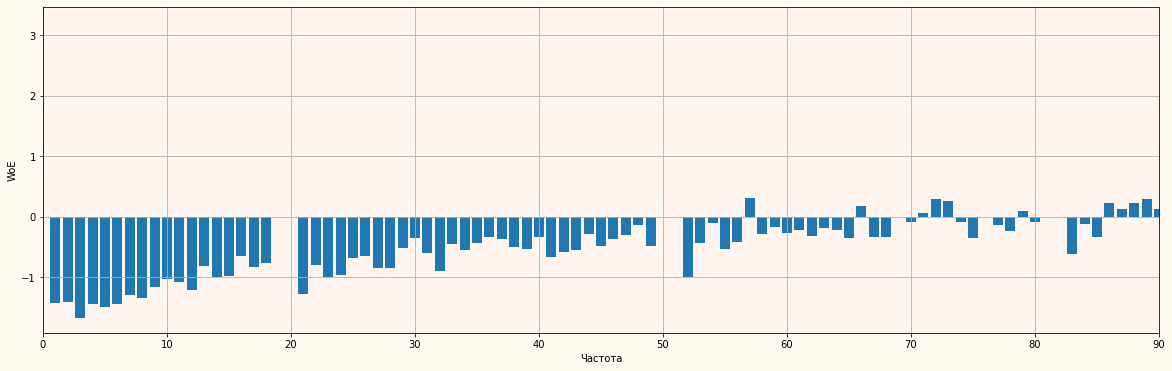

In [119]:
fig, ax = plt.subplots()
ax.bar(rr.Value,rr.WoE)
ax.grid()
ax.set_xlim([0, 90])
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.set_xlabel('Частота', color='k')
ax.set_ylabel('WoE', color='k')

In [138]:
woe = sign.groupby(['Событие','Давность'])['Событие'].count()

In [141]:
(woe.loc[[0]]/(woe.loc[[0]].sum()))/(woe.loc[[1]]/(woe.loc[[1]].sum()))

Событие  Давность
0        1.0        NaN
         2.0        NaN
         3.0        NaN
         4.0        NaN
         5.0        NaN
                     ..
1        813.0      NaN
         814.0      NaN
         843.0      NaN
         962.0      NaN
         993.0      NaN
Name: Событие, Length: 1238, dtype: float64

In [137]:
woe

Событие  Давность
0        1.0                                                       236
         2.0                                                       267
         3.0                                                       190
         4.0                                                       194
         5.0                                                       168
                                           ...                        
1        814.0                                                       1
         843.0                                                       1
         962.0                                                       1
         993.0                                                       1
Fp                   Событие  Давность
0        1.0         0.00725...
Name: Событие, Length: 1239, dtype: object

In [ ]:
Ni = woe.loc[[0]]
N = woe.loc[[0]].sum()
B = Ni/N
Pi = woe.loc[[1]]
P = woe.loc[[1]].sum()
G = Pi/P

In [120]:
woe = sign.groupby('Давность')['Событие'].count()
fdf = pd.DataFrame(data = woe)
fdf = fdf.rename(columns = {'Событие':'Good'})
fdf['Bad'] = 1-fdf.Good
fdf['Bad'] = np.where(fdf['Bad'] == 0, 0.000001, fdf['Bad'])
fdf['WoE'] = np.log(fdf.Good/fdf.Bad)
fdf = fdf.replace({'WoE': {np.inf: 0, -np.inf: 0}})

C:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [121]:
fig, ax = plt.subplots()
ax.bar(fdf.index,fdf.WoE)
ax.grid()
ax.set_xlim([0, 90])
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.set_xlabel('Частота', color='k')
ax.set_ylabel('WoE', color='k')

Text(0, 0.5, 'WoE')